In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:

df = pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [5]:
df.shape

(32560, 15)

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

All columns seems good

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We can see there is no null values
As we Have have only 2 Values in target column so we will use the Classification¶

<AxesSubplot:>

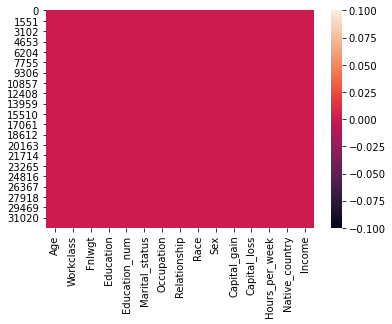

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Univariate Analysis

In [12]:
df.columns.values

array(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'], dtype=object)

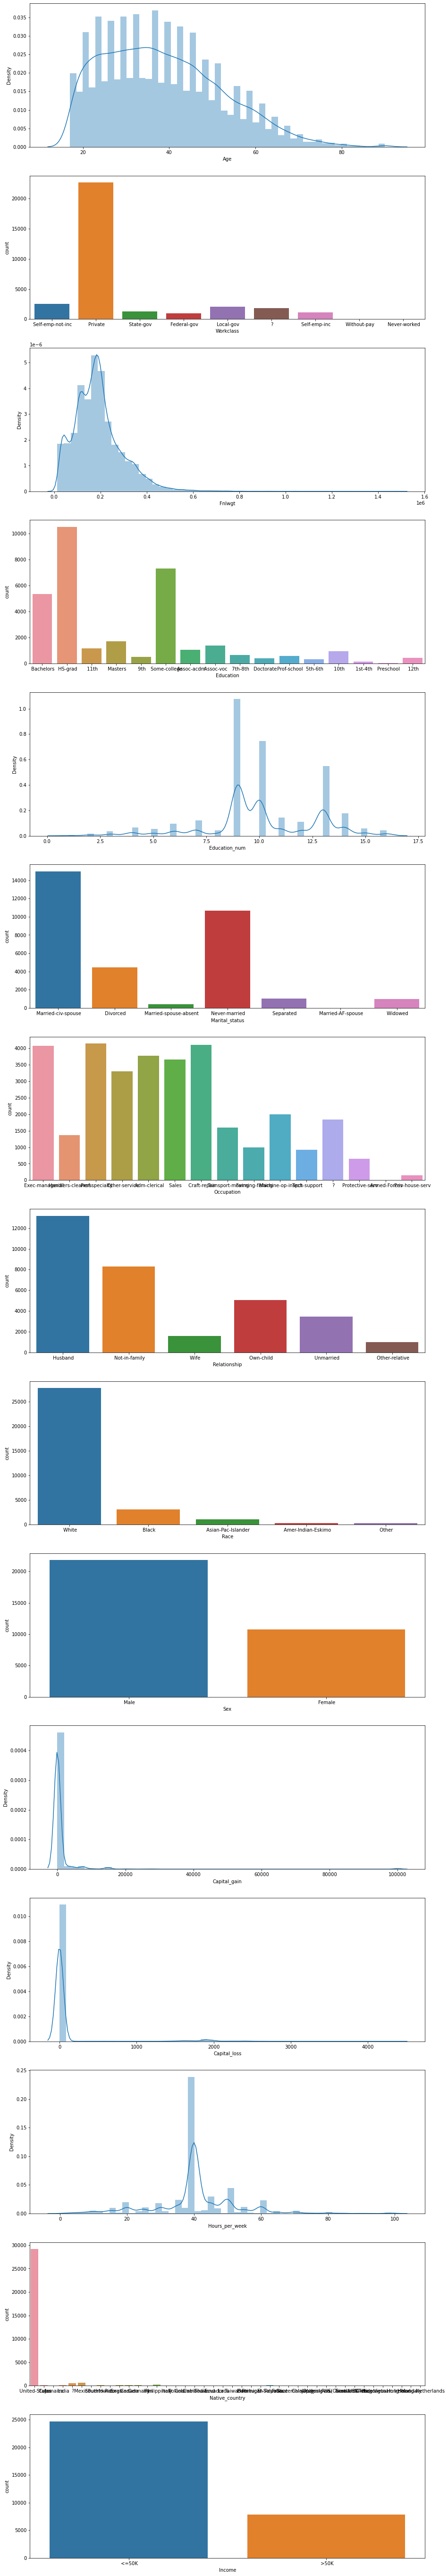

In [13]:
plt.figure(figsize=[15,200])
for i,column_data in enumerate(df.dtypes.items()):
    column, dtype  = column_data
    plt.subplot(30,1,i+1)
    
    if dtype == 'object':
        sns.countplot(df[column])
    else:
        sns.distplot(df[column],kde=True)

By seeing this Details we can Day that




Most people are from 20 to 50
Most People work on Private Organisation
Most Poeple are HS-Graduated
MOst of people are from United States
Maried and Never mariged people are earing more
White Race People are earing more
Most of Males are earns more
lots of people are earing less than 50 k

# Bivariate Analysis

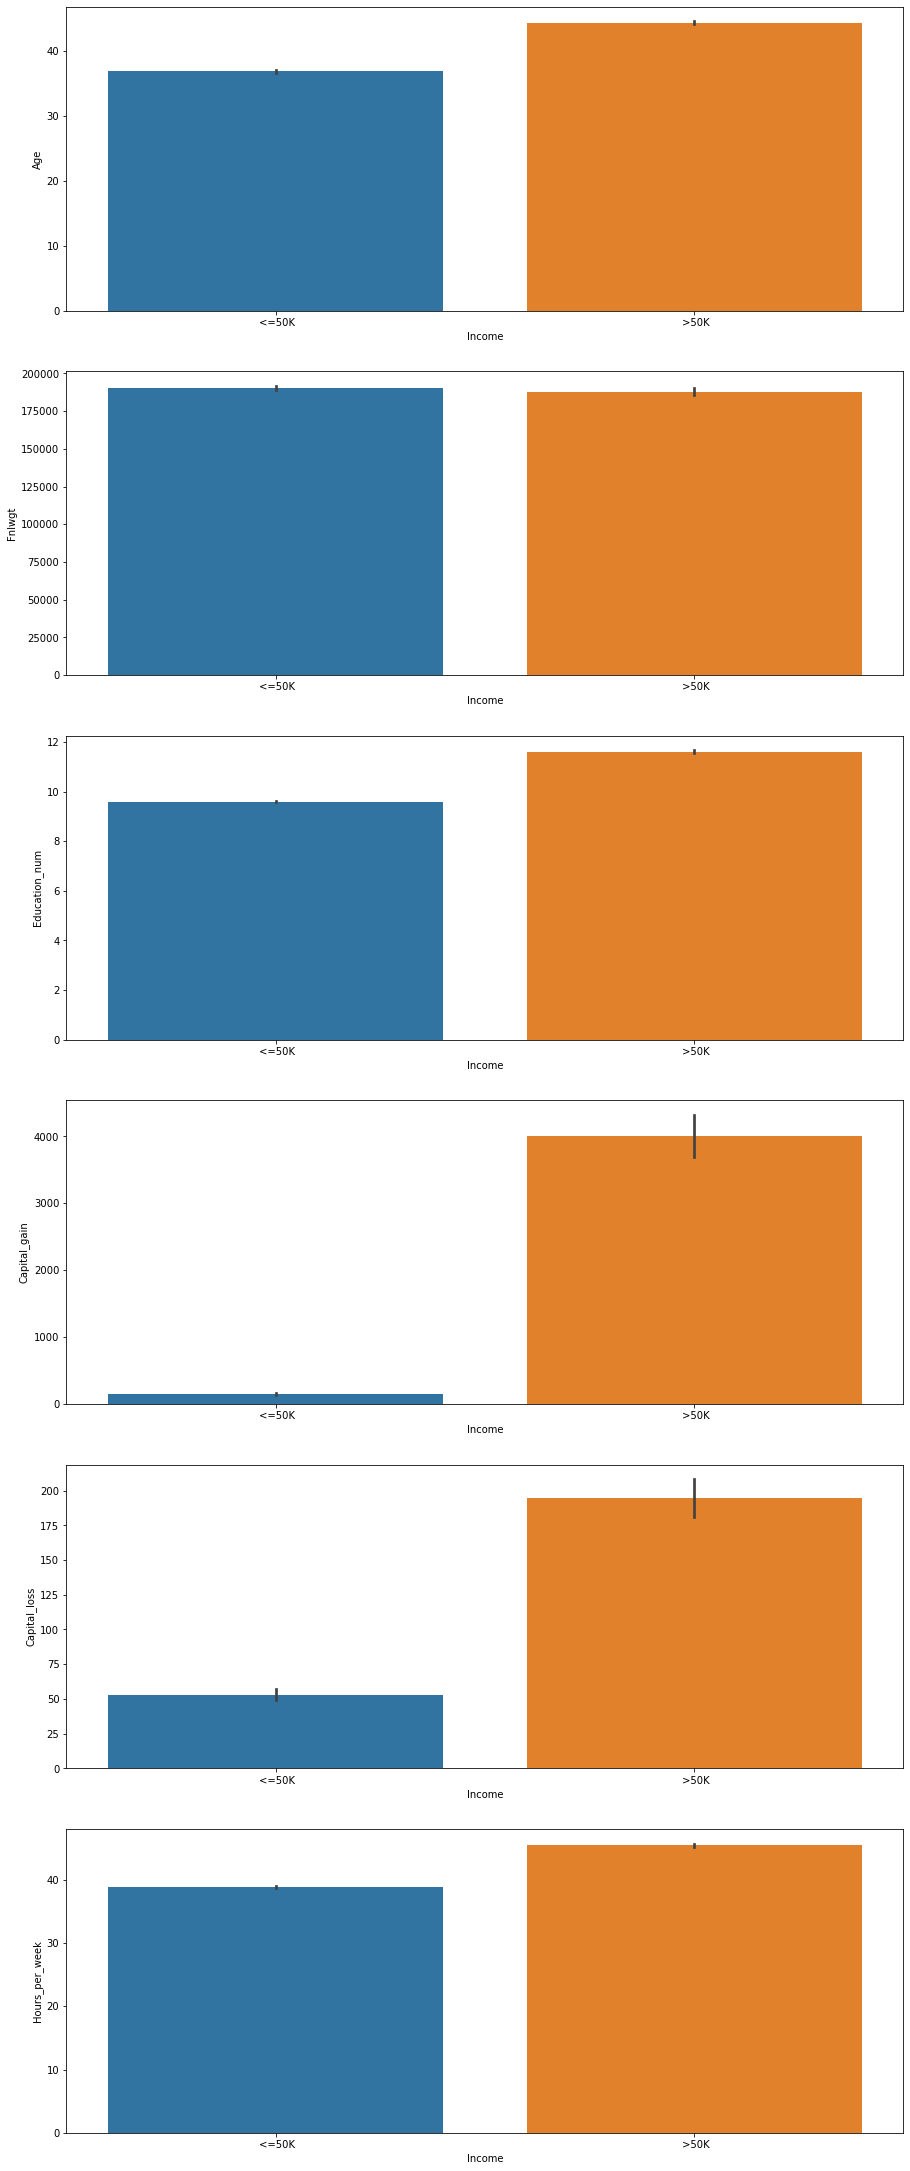

In [14]:
plt.figure(figsize=[15,200])
j = 0 
for column, dtype in df.drop('Income',axis=1).dtypes.items():
    if dtype != 'object':
        plt.subplot(30,1,j+1)    
        sns.barplot(df['Income'],df[column],)
        j += 1

We can see the Folliwng thing in Our Graph




High Age people are earing more
Higher educated people are making more money
Poeople having Hight gain has high income and high loss
Poeople with more than Hight per week are earing more

# CHecking for outliers

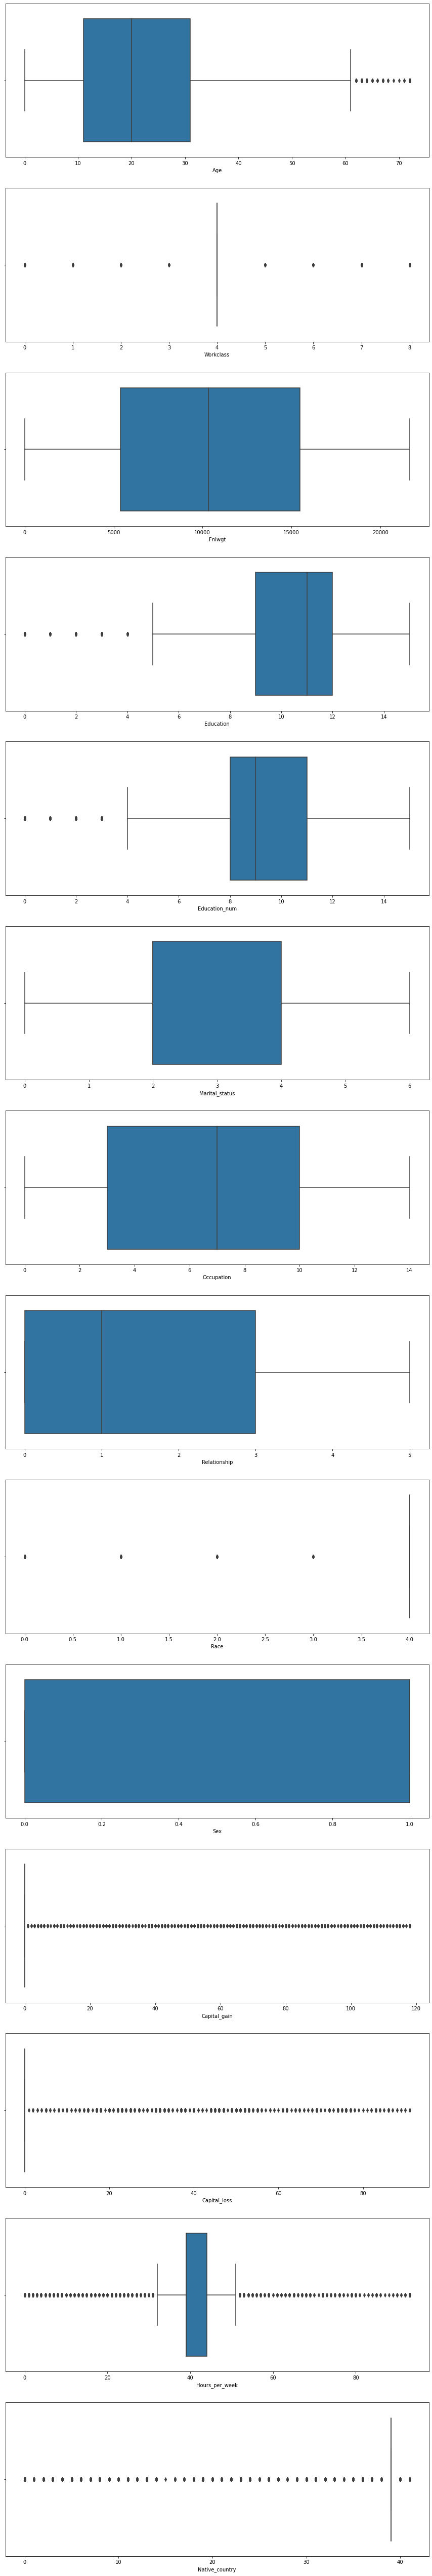

In [17]:
plt.figure(figsize=[15,200])
j = 0 
for column, dtype in df.drop('Income',axis=1).dtypes.items():
    if dtype != 'object':
        plt.subplot(30,1,j+1)    
        sns.boxplot(df[column],)
        j += 1

# Label Encoding

In [16]:
df = df.apply(LabelEncoder().fit_transform)

# Spliting the Data

In [18]:
X = df.drop('Income',axis=1)
y = df['Income']

In [19]:
df.skew().abs().sort_values()

Marital_status    0.013448
Fnlwgt            0.063137
Hours_per_week    0.069753
Occupation        0.114540
Education_num     0.311630
Age               0.555583
Sex               0.719244
Workclass         0.752280
Relationship      0.786784
Education         0.934063
Income            1.212383
Race              2.435332
Capital_gain      3.572186
Native_country    3.658235
Capital_loss      5.266058
dtype: float64

# Doing Power Transform¶

In [20]:
X_transformed = PowerTransformer().fit_transform(X)
X = pd.DataFrame(X_transformed,columns=X.columns)

# Modal Building

In [21]:
models = {
    'logisticRegression' : LogisticRegression(),
    'decisionTreeClassifier' : DecisionTreeClassifier(),
    'svc' : SVC(probability=True),
    'kNeighborsClassifier' : KNeighborsClassifier()
}

In [22]:
def build_model(model_obj):
    
    name, model = model_obj
        
    print('----------------------------------')
    print('*****',name,'******')
    print('----------------------------------')
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    accuracy_score = metrics.accuracy_score(y_test,y_pred)
    confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    
    fpr, tpr , _ = metrics.roc_curve(y_test,y_pred_proba)
    auc = metrics.roc_auc_score(y_test,y_pred_proba)
    
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr)
    plt.title('AUC ROC Curve for ' + name)
    
    kFold = KFold(n_splits=3,shuffle=True,random_state=42)
    scores = cross_val_score(model,X,y,cv=kFold,scoring='accuracy',n_jobs=-1)
    
    mean_cv_scores = np.mean(scores)
    std_cv_scores = np.std(scores)
    
    diff_acc_score_cv_score = np.abs(accuracy_score - mean_cv_scores)
    
    print('Confussion matrix: \n',confusion_matrix)
    print('\nscore: ',accuracy_score)
    print('auc: ',auc)
    plt.show()
    print('Cross Val Score: ',mean_cv_scores)
    print('Cross Val std: ',std_cv_scores)
    print('Diff Between score and CV score: ', diff_acc_score_cv_score)
    print('__________________________________________\n'*2)
    
    return (name, accuracy_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model)

In [23]:

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,shuffle=True)

----------------------------------
***** logisticRegression ******
----------------------------------
Confussion matrix: 
 [[5725  432]
 [1023  960]]

score:  0.8212530712530712
auc:  0.8495963456146778


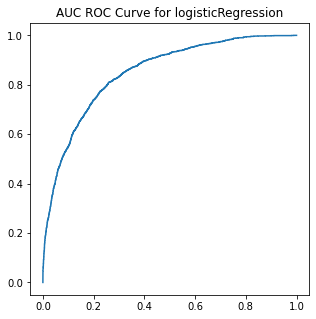

Cross Val Score:  0.8248464851207763
Cross Val std:  0.0021464385772383063
Diff Between score and CV score:  0.003593413867705064
__________________________________________
__________________________________________

----------------------------------
***** decisionTreeClassifier ******
----------------------------------
Confussion matrix: 
 [[5321  836]
 [ 772 1211]]

score:  0.8024570024570025
auc:  0.7376731370457562


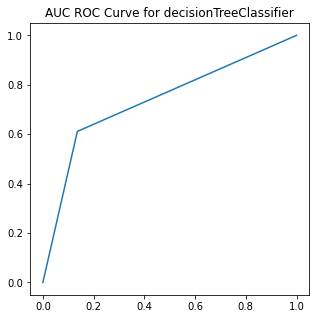

Cross Val Score:  0.8049753682975362
Cross Val std:  0.002634773343298018
Diff Between score and CV score:  0.002518365840533776
__________________________________________
__________________________________________

----------------------------------
***** svc ******
----------------------------------
Confussion matrix: 
 [[5742  415]
 [ 967 1016]]

score:  0.8302211302211302
auc:  0.8744488129611688


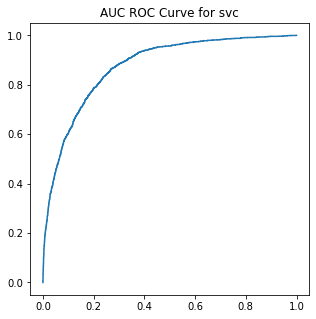

Cross Val Score:  0.8350124356179341
Cross Val std:  0.004178804043071564
Diff Between score and CV score:  0.0047913053968039465
__________________________________________
__________________________________________

----------------------------------
***** kNeighborsClassifier ******
----------------------------------


C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Confussion matrix: 
 [[5513  644]
 [ 822 1161]]

score:  0.8199017199017199
auc:  0.8442940485436916


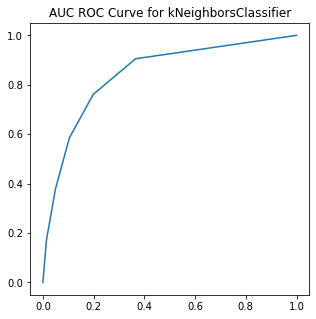

Cross Val Score:  0.8185810354637737
Cross Val std:  0.0014874134282207444
Diff Between score and CV score:  0.0013206844379461957
__________________________________________
__________________________________________



In [24]:
final_model_list = []
for one_model in models.items():
    
    name, accuracy_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model = build_model(one_model)
    final_model_list.append({
        'name': name,
        'accuracy_score': accuracy_score,
        'mean_cv_scores': mean_cv_scores,
        'std_cv_scores': std_cv_scores,
        'diff_acc_score_cv_score': diff_acc_score_cv_score,
        'model': model,

    })


The best model is kNeighborsClassifier

# Grid search CV with best model¶

In [25]:
# The Best model is 
sorted(final_model_list,key=lambda item : item['diff_acc_score_cv_score'])[0]['name']

'kNeighborsClassifier'

In [26]:
kNeighborsClassifier = sorted(final_model_list,key=lambda item : item['diff_acc_score_cv_score'])[0]['model']

In [27]:
param_grid = {
    'n_neighbors': [5,6,7],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform','distance'],
    'leaf_size' : [30,40],
    
}
gridSearchCV = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,n_jobs=-1)
gridSearchCV.fit(X_train,y_train)
print(gridSearchCV.best_score_)
print(gridSearchCV.best_params_)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.82375102 0.82153972 0.82719083 0.82366912 0.82714988 0.82649468
 0.82375102 0.82153972 0.82719083 0.82366912 0.82714988 0.82649468
 0.82375102 0.82153972 0.82719083 0.82366912 0.82714988 0.82649468
 0.82375102 0.82153972 0.82719083 0.82366912 0.82714988 0.82649468
 0.82375102 0.82153972 0.82719083 0.82366912 0.82714988 0.82649468
 0.82375102 0.82153972 0.82719083 0.82366912 0.82714988 0.82649468
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


0.8271908271908271
{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 6, 'weights': 'uniform'}


# Saving the model

In [28]:
pickle.dump(kNeighborsClassifier,open('svc.pkl','wb'))